### 從陣列中存取元素
從 Python 容器中取出元素的方法有索引（index）跟切片（slice），在 NumPy 的陣列中，也一樣保留了這兩種存取資料的用法。

In [1]:
L = [0, 1, 8]
print(L)
print(L[-1]) # 8
print(L[0]) # 0
print(L[1:3]) # [1, 8]

[0, 1, 8]
8
0
[1, 8]


In [2]:
import numpy as np 
a = np.arange(3) ** 3
print('a=',a)
print('(a[-1]=',a[-1]) # 8
print('(a[0]=',a[0]) # 0
print('(a[1:3]=',a[1:3]) # [1 8]

a= [0 1 8]
(a[-1]= 8
(a[0]= 0
(a[1:3]= [1 8]


#### 1. 一維陣列的切片與索引
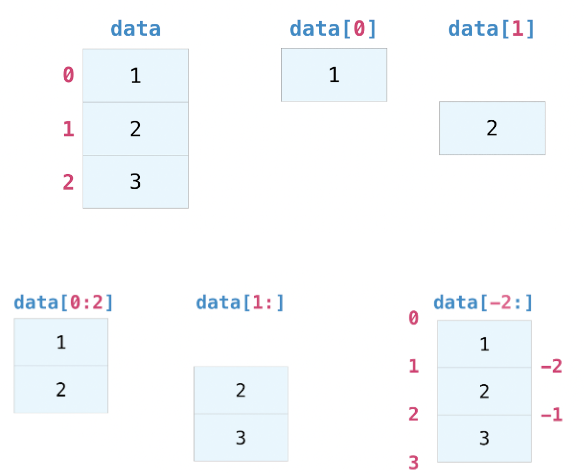

In [3]:
import numpy as np 
data = np.array([1, 2, 3])
print(data[0]) # 取出第 0 個
print(data[1]) # 取出第 1 個
print(data[0:2]) # 第 0 - 1 個
print(data[1:]) # 第 1 到最後一個
print(data[-2:]) # 倒數第二到最後一個

1
2
[1 2]
[2 3]
[2 3]


#### 2. 多維陣列的切片與索引
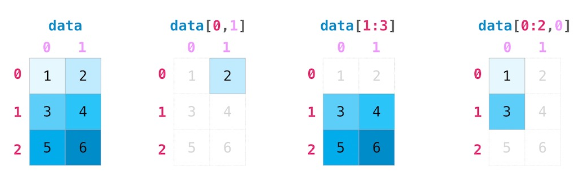

#### 3.多維陣列的多層迴圈
對於多維陣列如果想要迭代的話，可能就必須要一層一層的迴圈逐步取出資料：

In [18]:
import numpy as np 
a = np.arange(6).reshape(3, 2)
for row in a:
    print(row)
    
for index_x,row in enumerate(a):
        for index_y,elems in enumerate(row):
            print(f'(index_x,index_y)=({index_x},{index_y}),elems ={elems}')


[0 1]
[2 3]
[4 5]
(index_x,index_y)=(0,0),elems =0
(index_x,index_y)=(0,1),elems =1
(index_x,index_y)=(1,0),elems =2
(index_x,index_y)=(1,1),elems =3
(index_x,index_y)=(2,0),elems =4
(index_x,index_y)=(2,1),elems =5


In [19]:
import numpy as np 
a = np.arange(6).reshape(3, 2)
for d in a.flat: # 實務上我們會建議可以先攤平在進行迴圈的操作
    print(d)

0
1
2
3
4
5


#### 4. np.nditer 迭代物件 :
正確的用法會建立改成使用 np.nditer 迭代物件，這樣才可以享有向量運算的特性。
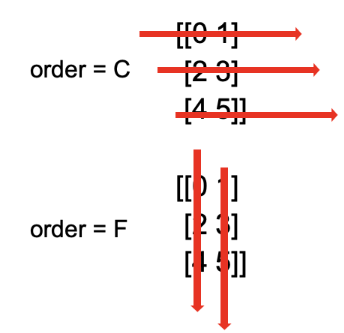

In [22]:
import numpy as np 
a = np.arange(6).reshape(3, 2)
for d in np.nditer(a):
    print(d)
print()
import numpy as np 
a = np.arange(6).reshape(3, 2)
for d in np.nditer(a, order='F'):
    print(d)    

0
1
2
3
4
5

0
2
4
1
3
5


#### 5.NumPy陣列的索引和切片 (Slicing)
* 透過索引存取陣列元素或進行切片 (slicing)，可以使用索引值，或是 [start:stop:step] 語法取得範圍內的元素
<br>，要留意的是起始-結束範圍仍是 half-open 的，所以回傳的元素將不包含結束索引的元素。
* 索引 -1 表示取得最後一個元素。切片如果只有給定 step 值為 -1 的話，則代表是反向取出，元素值是從最後一筆開始取出。
* 若沒有給定 start 或 stop 值的話則代表是取出該索引之前或之後的所有元素。若 start 和 stop 值都沒有給定的話，就是取出所有元素

In [43]:
import numpy as np 
a = np.arange(6).reshape(3, 2)
for x in np.nditer(a):
    print(x,end=" ")
print()

for x in np.nditer(a.T):
    print(x,end=',')
print()
for x in np.nditer(a, order='F'):
    print(x,end=',')
print()
for x in np.nditer(a, order='C'):
    print(x,end=',')
print('\n-----------------------------------------')
a = np.arange(6).reshape(2, 3)
print('a=\n',a)
for x in np.nditer(a,flags = ['external_loop'], order='F'):
    print(x)

0 1 2 3 4 5 
0,1,2,3,4,5,
0,2,4,1,3,5,
0,1,2,3,4,5,
-----------------------------------------
a=
 [[0 1 2]
 [3 4 5]]
[0 3]
[1 4]
[2 5]


In [46]:
b = np.arange(27).reshape(3,3,3)
print('b=\n',b)
print('===============================')
it = np.nditer(b, flags = ['multi_index'])
while not it.finished:
    print('%d<%s>'%(it[0],it.multi_index),end=',')
    it.iternext()

b=
 [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
0<(0, 0, 0)>,1<(0, 0, 1)>,2<(0, 0, 2)>,3<(0, 1, 0)>,4<(0, 1, 1)>,5<(0, 1, 2)>,6<(0, 2, 0)>,7<(0, 2, 1)>,8<(0, 2, 2)>,9<(1, 0, 0)>,10<(1, 0, 1)>,11<(1, 0, 2)>,12<(1, 1, 0)>,13<(1, 1, 1)>,14<(1, 1, 2)>,15<(1, 2, 0)>,16<(1, 2, 1)>,17<(1, 2, 2)>,18<(2, 0, 0)>,19<(2, 0, 1)>,20<(2, 0, 2)>,21<(2, 1, 0)>,22<(2, 1, 1)>,23<(2, 1, 2)>,24<(2, 2, 0)>,25<(2, 2, 1)>,26<(2, 2, 2)>,

In [47]:
ls =[[[1,2,3,4],[5,6,7,8],[9,10,11,12]],[[13,14,15,16],[17,18,19,20],[21,22,23,24]]]
a = np.array(ls, dtype=int)
print('a=\n',a)
print('a.shape=',a.shape)
print('a.strides=',a.strides)

a=
 [[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]
a.shape= (2, 3, 4)
a.strides= (48, 16, 4)
